In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir("C:/Users/hp/traffic-signs-data")
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [ ]:
pip install tensorboard==1.14.0

In [7]:
data = []
labels = []
# We have 43 Classes
classes = 43
current_path = os.getcwd()

In [8]:
current_path

'C:\\Users\\hp\\traffic-signs-data'

In [9]:
for i in range(classes):
    path = os.path.join(current_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [10]:
data = np.array(data)
labels = np.array(labels)

In [11]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [12]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=0)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31367, 30, 30, 3)
(7842, 30, 30, 3)
(31367,)
(7842,)


In [14]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 20
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 108s 3ms/step - loss: 1.9505 - accuracy: 0.4872 - val_loss: 0.5231 - val_accuracy: 0.8707
Epoch 2/20
31367/31367 [==============================] - 108s 3ms/step - loss: 0.6589 - accuracy: 0.8040 - val_loss: 0.2182 - val_accuracy: 0.9421
Epoch 3/20
31367/31367 [==============================] - 110s 4ms/step - loss: 0.4601 - accuracy: 0.8656 - val_loss: 0.2606 - val_accuracy: 0.9232
Epoch 4/20
31367/31367 [==============================] - 105s 3ms/step - loss: 0.3649 - accuracy: 0.8925 - val_loss: 0.1449 - val_accuracy: 0.9588
Epoch 5/20
31367/31367 [==============================] - 105s 3ms/step - loss: 0.3430 - accuracy: 0.9021 - val_loss: 0.1148 - val_accuracy: 0.9680
Epoch 6/20
31367/31367 [==============================] - 105s 3ms/step - loss: 0.3307 - accuracy: 0.9080 - val_loss: 0.1261 - val_accuracy: 0.9643
Epoch 7/20
31367/31367 [==============================] - 106s 

In [19]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    x_test=np.array(data)
    return x_test,label

In [20]:
x_test, label = testing('Test.csv')

In [21]:

y_pred = model.predict_classes(x_test)
y_pred

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [22]:
print(accuracy_score(label, y_pred))

0.9499604117181314


In [23]:
model.save("traffic_classifier.h5")

In [24]:
import os
os.chdir(r'C:/Users/hp/traffic-signs-data')
from keras.models import load_model
model = load_model('traffic_classifier.h5')

In [25]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [26]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    x_test=np.array(data)
    y_pred = model.predict_classes(x_test)
    return image,y_pred

Predicted traffic sign is:  Speed limit (100km/h)


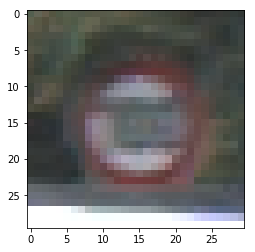

In [27]:
plot,prediction = test_on_img(r"C:\Users\hp\traffic-signs-data\Train\7\00007_00001_00012.png")
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [28]:
import pickle
filename = 'traffic_classifier.h6'
pickle.dump(model, open(filename, 'wb'))

Predicted traffic sign is:  Road work


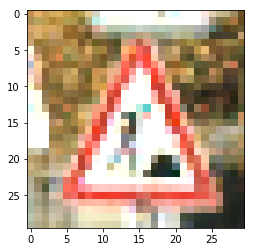

In [29]:
plot,prediction = test_on_img(r"C:\Users\hp\traffic-signs-data\Test\00008.png")
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()